# Problem Identification

Hypothesis: Can we predict a loan (target) based on different features?

# Data Preparation and Feature Engineering


## Dataprep and import


In [70]:
!pip install umap-learn -q

In [71]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import umap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, NMF
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier  # Example of ensemble models


sns.set()
!pip install xgboost -q
!pip install shap -q
!pip install imbalanced-learn -q

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBRegressor
import shap
import joblib

In [72]:
# Clone repository from GitHub
!git clone https://github.com/aaubs/ds-master.git


fatal: destination path 'ds-master' already exists and is not an empty directory.


In [73]:
import os

# Locate the correct filepath
#os.chdir('/content/ds-master/data/assignments_datasets/KIVA')

# Check to see if the datasets are there
# !ls



In [74]:
!pip install wget
!pip install unzip
# Download data from Github (we will use the loan-datasets for now)

!wget -nc "https://github.com/aaubs/ds-master/raw/main/data/assignments_datasets/KIVA/kiva_loans_part_0.csv.zip"
!wget -nc "https://github.com/aaubs/ds-master/raw/main/data/assignments_datasets/KIVA/kiva_loans_part_1.csv.zip"
!wget -nc "https://github.com/aaubs/ds-master/raw/main/data/assignments_datasets/KIVA/kiva_loans_part_2.csv.zip"

# Unzip to csv
!unzip -o kiva_loans_part_0.csv.zip
!unzip -o kiva_loans_part_1.csv.zip
!unzip -o kiva_loans_part_2.csv.zip

# Loading datasets
data_part1 = pd.read_csv("kiva_loans_part_0.csv")
data_part2 = pd.read_csv("kiva_loans_part_1.csv")
data_part3 = pd.read_csv("kiva_loans_part_2.csv")

zsh:1: command not found: wget
zsh:1: command not found: wget
zsh:1: command not found: wget
unzip:  cannot find or open kiva_loans_part_0.csv.zip, kiva_loans_part_0.csv.zip.zip or kiva_loans_part_0.csv.zip.ZIP.
unzip:  cannot find or open kiva_loans_part_1.csv.zip, kiva_loans_part_1.csv.zip.zip or kiva_loans_part_1.csv.zip.ZIP.
unzip:  cannot find or open kiva_loans_part_2.csv.zip, kiva_loans_part_2.csv.zip.zip or kiva_loans_part_2.csv.zip.ZIP.


In [75]:
#Load them into pandas dataframes
df_part_0 = pd.read_csv('kiva_loans_part_0.csv')
df_part_1 = pd.read_csv('kiva_loans_part_1.csv')
df_part_2 = pd.read_csv('kiva_loans_part_2.csv')
#df_mpi_region = pd.read_csv('kiva_mpi_region_locations.csv')
#df_loan_theme_ids = pd.read_csv('loan_theme_ids.csv')
#df_loan_themes_by_region = pd.read_csv('loan_themes_by_region.csv')

In [76]:
#Check if the columns makes sense
df_part_0.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

## Data Cleaning, manipulation and engineering

In [77]:
#Concatonating the dataset
data = pd.concat([df_part_0, df_part_1, df_part_2])
#Using head to get an overview of the data
data.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [78]:
data.shape

(671205, 20)

In [79]:
#Making sure they are dropped correctly
data.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

In [80]:
# We would like to also include the time/duration between posted_time and funded_time - in other words: how long it takes to get a loan funded
# convert to pd.datetime
data['posted_time'] = pd.to_datetime(data['posted_time'])
data['funded_time'] = pd.to_datetime(data['funded_time'])

# calculate time between posted_time and funded_time
data['funding_duration'] = data['funded_time'] - data['posted_time']

# the result in days instead of a timedelta
data['funding_duration_days'] = (data['funded_time'] - data['posted_time']).dt.total_seconds() / (24 * 60 * 60)

# first rows to check
print(data[['posted_time', 'funded_time', 'funding_duration', 'funding_duration_days']].head())


                posted_time               funded_time funding_duration  \
0 2014-01-01 06:12:39+00:00 2014-01-02 10:06:32+00:00  1 days 03:53:53   
1 2014-01-01 06:51:08+00:00 2014-01-02 09:17:23+00:00  1 days 02:26:15   
2 2014-01-01 09:58:07+00:00 2014-01-01 16:01:36+00:00  0 days 06:03:29   
3 2014-01-01 08:03:11+00:00 2014-01-01 13:00:00+00:00  0 days 04:56:49   
4 2014-01-01 11:53:19+00:00 2014-01-01 19:18:51+00:00  0 days 07:25:32   

   funding_duration_days  
0               1.162419  
1               1.101562  
2               0.252419  
3               0.206123  
4               0.309398  


In [81]:
#Dropping columns that are not needed
data_cleaned = data.drop(['use', 'currency', 'id', 'disbursed_time', 'tags', 'country_code', 'date', 'repayment_interval', 'posted_time', 'funded_time', 'funding_duration'], axis=1)

In [82]:
data_cleaned.head()

,funded_amount,loan_amount,activity,sector,country,region,partner_id,term_in_months,lender_count,borrower_genders,funding_duration_days
0,300.0,300.0,Fruits & Vegetables,Food,Pakistan,Lahore,247.0,12.0,12,female,1.162419
1,575.0,575.0,Rickshaw,Transportation,Pakistan,Lahore,247.0,11.0,14,"female, female",1.101562
2,150.0,150.0,Transportation,Transportation,India,Maynaguri,334.0,43.0,6,female,0.252419
3,200.0,200.0,Embroidery,Arts,Pakistan,Lahore,247.0,11.0,8,female,0.206123
4,400.0,400.0,Milk Sales,Food,Pakistan,Abdul Hakeem,245.0,14.0,16,female,0.309398


In [83]:
#Dropping missing values
data_cleaned.dropna(inplace=True)

In [84]:
data_cleaned.isna().sum()

funded_amount            0
loan_amount              0
activity                 0
sector                   0
country                  0
region                   0
partner_id               0
term_in_months           0
lender_count             0
borrower_genders         0
funding_duration_days    0
dtype: int64

In [85]:
data_cleaned.head()

,funded_amount,loan_amount,activity,sector,country,region,partner_id,term_in_months,lender_count,borrower_genders,funding_duration_days
0,300.0,300.0,Fruits & Vegetables,Food,Pakistan,Lahore,247.0,12.0,12,female,1.162419
1,575.0,575.0,Rickshaw,Transportation,Pakistan,Lahore,247.0,11.0,14,"female, female",1.101562
2,150.0,150.0,Transportation,Transportation,India,Maynaguri,334.0,43.0,6,female,0.252419
3,200.0,200.0,Embroidery,Arts,Pakistan,Lahore,247.0,11.0,8,female,0.206123
4,400.0,400.0,Milk Sales,Food,Pakistan,Abdul Hakeem,245.0,14.0,16,female,0.309398


In [86]:
#Locating the only variables that are needed for the proces
df = data_cleaned.iloc[:, :10]


In [87]:
loans = data_cleaned

In [88]:
import re

# Tæl antallet af mandlige og kvindelige låntagere (Count the number of male and female borrowers)
loans['male_borrowers'] = loans['borrower_genders'].apply(lambda x: len(re.findall(r'\bmale', str(x))))
loans['female_borrowers'] = loans['borrower_genders'].apply(lambda x: len(re.findall(r'\bfemale', str(x))))

# Beregn det samlede antal låntagere (Calculate total number of borrowers)
loans['borrowers_count'] = loans['male_borrowers'] + loans['female_borrowers']

# Håndter situationer, hvor 'borrowers_count' er 0 for at undgå division med 0 (Handle cases where borrower count is 0 to avoid division by 0)
loans['male_borrower_ratio'] = loans['male_borrowers'] / loans['borrowers_count'].replace(0, 1)

# Funktion til at klassificere køn baseret på ratio (Function to classify gender based on ratio)
def classify_genders(ratio):
    if ratio == 1:
        return 'male group'
    elif ratio == 0:
        return 'female group'
    else:
        return 'mixed group'

# Anvend kønsklassifikationen (Apply gender classification)
loans['gender_class'] = loans['male_borrower_ratio'].apply(classify_genders)

# Udskriv resultatet (Print result)
print(loans[['borrower_genders', 'male_borrowers', 'female_borrowers', 'borrowers_count', 'male_borrower_ratio', 'gender_class']])

loans


       borrower_genders  male_borrowers  female_borrowers  borrowers_count  \
0                female               0                 1                1   
1        female, female               0                 2                2   
2                female               0                 1                1   
3                female               0                 1                1   
4                female               0                 1                1   
...                 ...             ...               ...              ...   
221157           female               0                 1                1   
221163           female               0                 1                1   
221164           female               0                 1                1   
221170           female               0                 1                1   
221186           female               0                 1                1   

        male_borrower_ratio  gender_class  
0                  

,funded_amount,loan_amount,activity,sector,country,region,partner_id,term_in_months,lender_count,borrower_genders,funding_duration_days,male_borrowers,female_borrowers,borrowers_count,male_borrower_ratio,gender_class
0,300.0,300.0,Fruits & Vegetables,Food,Pakistan,Lahore,247.0,12.0,12,female,1.162419,0,1,1,0.0,female group
1,575.0,575.0,Rickshaw,Transportation,Pakistan,Lahore,247.0,11.0,14,"female, female",1.101562,0,2,2,0.0,female group
2,150.0,150.0,Transportation,Transportation,India,Maynaguri,334.0,43.0,6,female,0.252419,0,1,1,0.0,female group
3,200.0,200.0,Embroidery,Arts,Pakistan,Lahore,247.0,11.0,8,female,0.206123,0,1,1,0.0,female group
4,400.0,400.0,Milk Sales,Food,Pakistan,Abdul Hakeem,245.0,14.0,16,female,0.309398,0,1,1,0.0,female group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221157,75.0,75.0,Livestock,Agriculture,Mexico,Iztacalco,294.0,13.0,3,female,0.576875,0,1,1,0.0,female group
221163,25.0,25.0,Livestock,Agriculture,Paraguay,Concepción,58.0,13.0,1,female,3.737975,0,1,1,0.0,female group
221164,25.0,25.0,Livestock,Agriculture,Pakistan,Attock,245.0,13.0,1,female,0.421308,0,1,1,0.0,female group
221170,25.0,25.0,Livestock,Agriculture,Pakistan,Attock,245.0,13.0,1,female,0.639803,0,1,1,0.0,female group


In [89]:
df.head()

,funded_amount,loan_amount,activity,sector,country,region,partner_id,term_in_months,lender_count,borrower_genders
0,300.0,300.0,Fruits & Vegetables,Food,Pakistan,Lahore,247.0,12.0,12,female
1,575.0,575.0,Rickshaw,Transportation,Pakistan,Lahore,247.0,11.0,14,"female, female"
2,150.0,150.0,Transportation,Transportation,India,Maynaguri,334.0,43.0,6,female
3,200.0,200.0,Embroidery,Arts,Pakistan,Lahore,247.0,11.0,8,female
4,400.0,400.0,Milk Sales,Food,Pakistan,Abdul Hakeem,245.0,14.0,16,female


In [90]:
print(loans.columns)


Index(['funded_amount', 'loan_amount', 'activity', 'sector', 'country',
       'region', 'partner_id', 'term_in_months', 'lender_count',
       'borrower_genders', 'funding_duration_days', 'male_borrowers',
       'female_borrowers', 'borrowers_count', 'male_borrower_ratio',
       'gender_class'],
      dtype='object')


In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [92]:
# Sample 50,000 rows from the loans DataFrame
loans_sampled = loans.sample(n=500, random_state=21)

# Reset index after sampling (optional)
loans_sampled = loans_sampled.reset_index(drop=True)

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Define the target variable 'y' (loan_amount)
y = loans_sampled['loan_amount']

# Define the feature set 'X' (all other columns except loan_amount)
X = loans_sampled[['activity', 'sector', 'country', 'borrowers_count', 'funding_duration_days', 'gender_class', 'region']]

# Preprocessing for numeric features
numeric_features = ['borrowers_count', 'funding_duration_days']
numeric_transformer = StandardScaler()

# Preprocessing for categorical features
categorical_features = ['activity', 'sector', 'country', 'region', 'gender_class']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
   transformers=[
       ('num', numeric_transformer, numeric_features),
       ('cat', categorical_transformer, categorical_features)
   ])




# Model Selection and Training


### 4. Apply at least two supervised learning algorithms
We will apply at least two different algorithms (e.g., Logistic Regression, Random Forest) and compare their performances.


In [94]:
# Define the regression model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                       ('regressor', LinearRegression())])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f'Training R^2 score: {train_score}')
print(f'Test R^2 score: {test_score}')

Training R^2 score: 0.9805024150928409
Test R^2 score: 0.3538643676653078


In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Define the Random Forest model pipeline without hyperparameters
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())  # Default hyperparameters are used
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
train_score_rf = rf_model.score(X_train, y_train)
test_score_rf = rf_model.score(X_test, y_test)

print(f'Random Forest - Training R^2 score: {train_score_rf}')
print(f'Random Forest - Test R^2 score: {test_score_rf}')


Random Forest - Training R^2 score: 0.9360726144969517
Random Forest - Test R^2 score: 0.6221652240848183


### 6. Perform hyperparameter tuning
We will perform hyperparameter tuning using GridSearchCV or RandomizedSearchCV to optimize performance.


In [108]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define the hyperparameter space for randomized search
param_distributions = {
    'regressor__n_estimators': np.arange(100, 201, 10),  # Randomly search between 100 and 200 trees
    'regressor__max_depth': np.arange(50, 101, 10),  # Randomly search between 50 and 100 for depth
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 3, 5]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_model, 
                                   param_distributions=param_distributions, 
                                   n_iter=10, cv=5, n_jobs=-1, scoring='r2', verbose=2, random_state=42)

# Perform randomized search on the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and R^2 score
print(f"Best hyperparameters: {random_search.best_params_}")
print(f"Best cross-validation R^2 score: {random_search.best_score_}")



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END regressor__max_depth=80, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=120; total time=   0.6s
[CV] END regressor__max_depth=80, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=120; total time=   0.6s
[CV] END regressor__max_depth=50, regressor__min_samples_leaf=1, regressor__min_samples_split=10, regressor__n_estimators=180; total time=   0.6s
[CV] END regressor__max_depth=50, regressor__min_samples_leaf=1, regressor__min_samples_split=10, regressor__n_estimators=180; total time=   0.7s
[CV] END regressor__max_depth=50, regressor__min_samples_leaf=1, regressor__min_samples_split=10, regressor__n_estimators=180; total time=   0.7s
[CV] END regressor__max_depth=50, regressor__min_samples_leaf=1, regressor__min_samples_split=10, regressor__n_estimators=180; total time=   0.7s
[CV] END regressor__max_depth=80, regressor__min_samples_leaf=1, 

In [109]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Define the Random Forest model pipeline (Hyperparameters are included already due to the parameter check later on)
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=1600, 
                                        max_depth=70, 
                                        min_samples_split=2, 
                                        min_samples_leaf=1, 
                                        random_state=42))
])
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
train_score_rf = rf_model.score(X_train, y_train)
test_score_rf = rf_model.score(X_test, y_test)

print(f'Random Forest - Training R^2 score: {train_score_rf}')
print(f'Random Forest - Test R^2 score: {test_score_rf}')


Random Forest - Training R^2 score: 0.9264495492982864
Random Forest - Test R^2 score: 0.591630511450663


### 5. Train the models using cross-validation
We will train the models using cross-validation and split the dataset into training and testing sets.


The cross-validation R² scores show how well the model explains the variation in the data across 5 different splits, with an average score of 0.578.
The model's performance on the test data is 0.615 R², which is fairly close to the cross-validation score, indicating consistent performance.

Above is the optimal Hyperparameters: Underneath is the optimal model. (The model is updated in the training part from these results)

In [98]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

# Evaluate the model on training and test data
train_score_rf = rf_model.score(X_train, y_train)
test_score_rf = rf_model.score(X_test, y_test)

# Print cross-validation scores and the final evaluation
print(f"Cross-Validation R^2 Scores: {cv_scores}")
print(f"Mean Cross-Validation R^2: {cv_scores.mean()}")
print(f'Random Forest - Training R^2 score: {train_score_rf}')
print(f'Random Forest - Test R^2 score: {test_score_rf}')


Cross-Validation R^2 Scores: [0.27877709 0.28882515 0.56631423 0.59179017 0.55400794]
Mean Cross-Validation R^2: 0.4559429188367816
Random Forest - Training R^2 score: 0.8551470632180019
Random Forest - Test R^2 score: 0.5799228724736305


# Model Evaluation


### Evaluate model performance
We will evaluate the model's performance using relevant metrics like accuracy, precision, recall, etc.


In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R^2 score: {r2}')


Mean Squared Error (MSE): 414617.59513847297
Root Mean Squared Error (RMSE): 643.9080641974233
Mean Absolute Error (MAE): 356.5206272555655
R^2 score: 0.5799228724736305


### 8. Include visualizations to support evaluation
We will include visualizations such as a confusion matrix or feature importance plots to support the evaluation.


In [100]:
# Extract the RandomForestRegressor from the pipeline
rf_regressor = rf_model.named_steps['regressor']


In [101]:
X_test_transformed = preprocessor.transform(X_test)


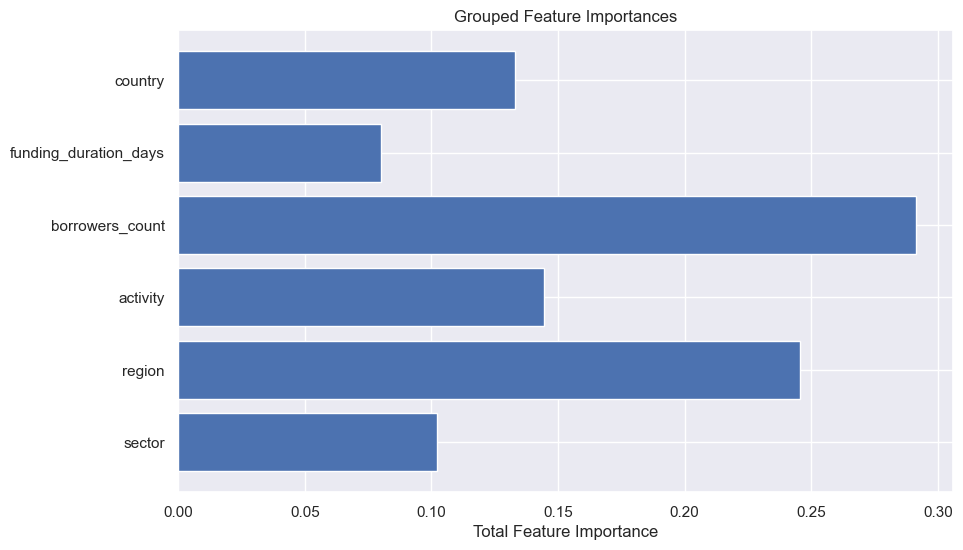

In [102]:
# We will reflect on the model’s transparency and the key factors that influence predictions.
# This will be achieved by analyzing feature importances and how each feature contributes to the model’s output.
# In particular, we will group one-hot encoded features back into their original categories
# and visualize their overall influence on the predictions.
# Get the feature names from the preprocessor
onehot_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
numeric_columns = numeric_features
all_feature_names = list(numeric_columns) + list(onehot_columns)

# Get the feature importances from the Random Forest model
importances = rf_model.named_steps['regressor'].feature_importances_

# Initialize a dictionary to store the grouped importances
grouped_importances = {
    'sector': 0,
    'region': 0,
    'activity': 0,
    'borrowers_count': 0,
    'funding_duration_days': 0,
    'country': 0
}

# Loop through all feature names and sum their importances by original feature group
for i, feature_name in enumerate(all_feature_names):
    if 'sector' in feature_name:
        grouped_importances['sector'] += importances[i]
    elif 'region' in feature_name:
        grouped_importances['region'] += importances[i]
    elif 'activity' in feature_name:
        grouped_importances['activity'] += importances[i]
    elif 'country' in feature_name:
        grouped_importances['country'] += importances[i]
    elif feature_name == 'borrowers_count':
        grouped_importances['borrowers_count'] += importances[i]
    elif feature_name == 'funding_duration_days':
        grouped_importances['funding_duration_days'] += importances[i]

# Convert the dictionary to a DataFrame for easy plotting
grouped_importances_df = pd.DataFrame(list(grouped_importances.items()), columns=['Feature', 'Importance'])

# Plot the grouped feature importances
plt.figure(figsize=(10, 6))
plt.barh(grouped_importances_df['Feature'], grouped_importances_df['Importance'])
plt.xlabel('Total Feature Importance')
plt.title('Grouped Feature Importances')
plt.show()


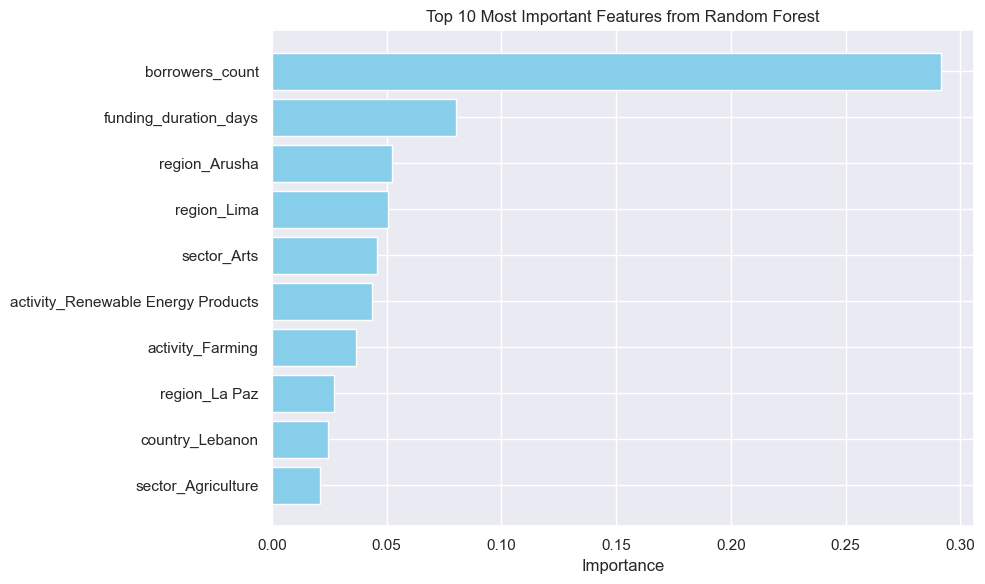

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Get the feature names from the preprocessor
onehot_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
numeric_columns = numeric_features
all_feature_names = list(numeric_columns) + list(onehot_columns)

# Get the feature importances from the Random Forest model
importances = rf_model.named_steps['regressor'].feature_importances_

# Ensure the feature names and feature importances match in size
if len(all_feature_names) != len(importances):
    print(f"Warning: Mismatch in feature names ({len(all_feature_names)}) and feature importances ({len(importances)}).")
    min_len = min(len(all_feature_names), len(importances))
    all_feature_names = all_feature_names[:min_len]
    importances = importances[:min_len]

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Select the top 10 most important features
top_n = 10  # Change this to any number of top features you want to display
top_features = np.array(all_feature_names)[indices][:top_n]
top_importances = importances[indices][:top_n]

# Create a bar plot for the top features
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Importance')
plt.title(f'Top {top_n} Most Important Features from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.tight_layout()
plt.show()


# Explainability


### 9. Use SHAP values or other tools for interpretability
We will use SHAP values or other interpretability tools to explain the factors driving the model’s predictions.


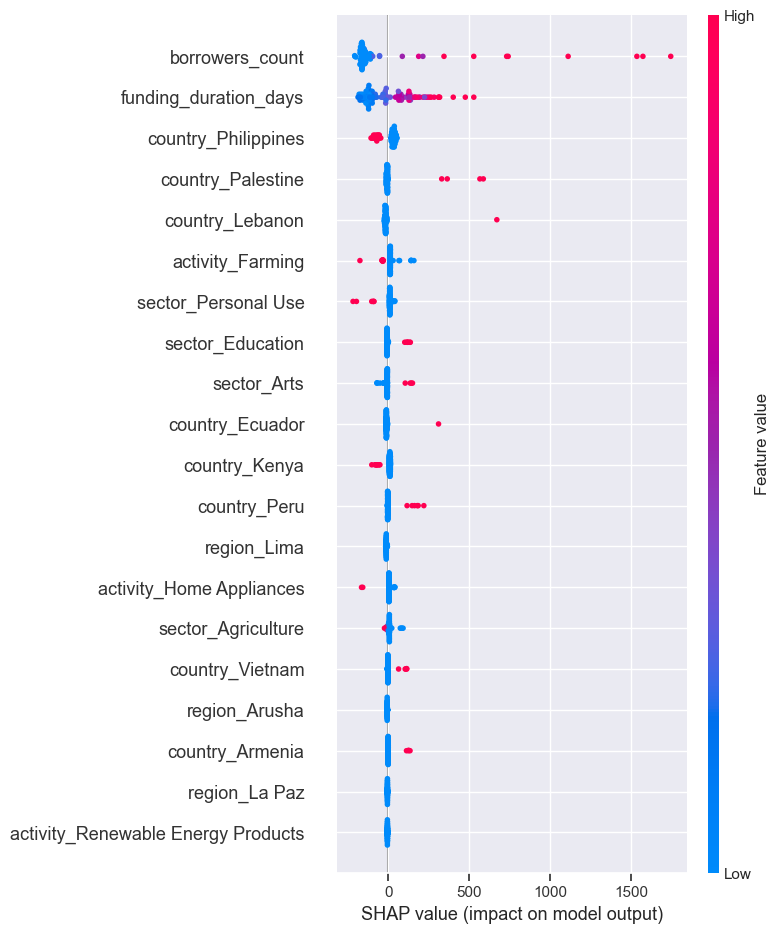

In [104]:
import shap
import matplotlib.pyplot as plt

# Step 1: Konverter de sparse transformerede data til en tæt matrix (dense array)
X_test_dense = X_test_transformed.toarray()  # Konverter sparse matrix til en tæt matrix

# Step 2: Initialiser SHAP TreeExplainer med din RandomForest model
explainer_shap = shap.TreeExplainer(rf_model.named_steps['regressor'])

# Step 3: Beregn SHAP-værdierne for de tætte data
shap_values = explainer_shap.shap_values(X_test_dense)

# Step 4: Hent de korrekte feature-navne fra preprocessor
onehot_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
numeric_columns = numeric_features
all_feature_names = list(numeric_columns) + list(onehot_columns)

# Step 5: Lav en SHAP summary plot for alle features (uden grouping)
shap.summary_plot(shap_values, X_test_dense, feature_names=all_feature_names)


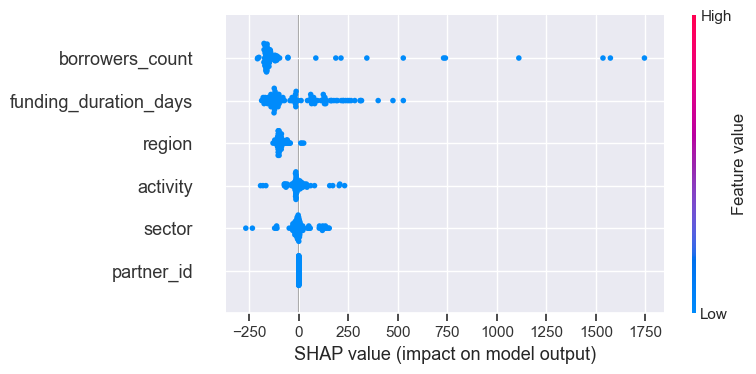

In [105]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Konverter sparse matrix til en tæt matrix
X_test_dense = X_test_transformed.toarray()

# Step 2: Initialiser SHAP TreeExplainer med din RandomForest model
explainer_shap = shap.TreeExplainer(rf_model.named_steps['regressor'])

# Step 3: Beregn SHAP-værdierne for de tætte data
shap_values = explainer_shap.shap_values(X_test_dense)

# Step 4: Hent de korrekte feature-navne fra preprocessor
onehot_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
numeric_columns = numeric_features
all_feature_names = list(numeric_columns) + list(onehot_columns)

# Step 5: Initialiser en dictionary til at gruppere SHAP-værdier efter overordnede features
grouped_shap_values = {
    'sector': 0,
    'region': 0,
    'activity': 0,
    'partner_id': 0,
    'borrowers_count': 0,
    'funding_duration_days': 0
}

# Step 6: Loop gennem alle feature-navne og summér SHAP-værdierne efter de oprindelige feature-grupper
shap_values_grouped = pd.DataFrame(0, index=range(X_test_dense.shape[0]), columns=grouped_shap_values.keys())

for i, feature_name in enumerate(all_feature_names):
    if 'sector' in feature_name:
        shap_values_grouped['sector'] += shap_values[:, i]
    elif 'region' in feature_name:
        shap_values_grouped['region'] += shap_values[:, i]
    elif 'activity' in feature_name:
        shap_values_grouped['activity'] += shap_values[:, i]
    elif 'partner_id' in feature_name:
        shap_values_grouped['partner_id'] += shap_values[:, i]
    elif feature_name == 'borrowers_count':
        shap_values_grouped['borrowers_count'] += shap_values[:, i]
    elif feature_name == 'funding_duration_days':
        shap_values_grouped['funding_duration_days'] += shap_values[:, i]

# Step 7: Opret en forenklet matrix, der matcher de grupperede features (for visualisering)
X_test_grouped = pd.DataFrame(0, index=range(X_test_dense.shape[0]), columns=grouped_shap_values.keys())

# Step 8: Lav en SHAP summary plot for de grupperede SHAP-værdier
shap.summary_plot(shap_values_grouped.values, X_test_grouped, feature_names=list(grouped_shap_values.keys()))




/var/folders/xc/v1l81vkx6fjc9wpqc0tsnl400000gn/T/ipykernel_6385/30311732.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal Fit')


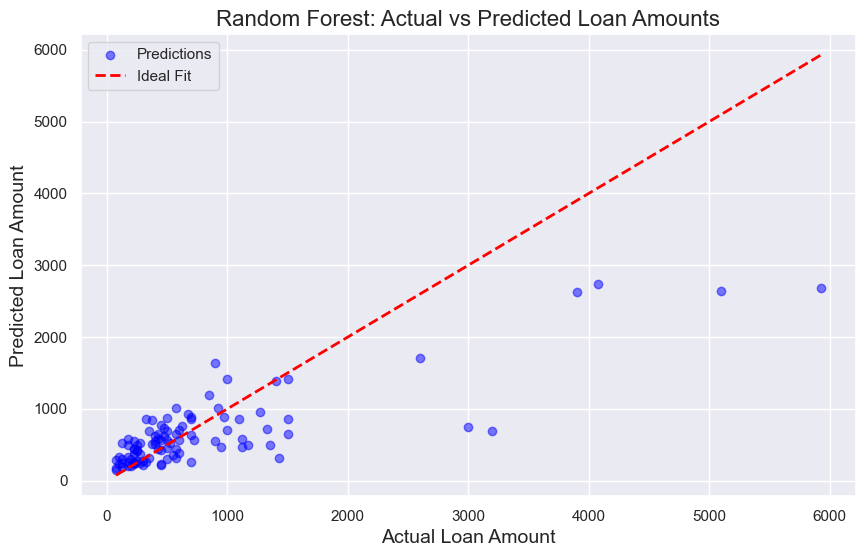

In [106]:
import matplotlib.pyplot as plt

# Step 1: Make predictions on the test set using your RandomForest model
y_pred = rf_model.predict(X_test)

# Step 2: Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal Fit')
plt.title('Random Forest: Actual vs Predicted Loan Amounts', fontsize=16)
plt.xlabel('Actual Loan Amount', fontsize=14)
plt.ylabel('Predicted Loan Amount', fontsize=14)
plt.legend()
plt.show()


# Reflections


### 11. Reflect on the feature selection process
Ultimately, the feature selection process balanced model performance with interpretability. The dimensionality of the dataset increased after one-hot encoding, but grouping those features helped manage this. SHAP values were also used to explore the contribution of each feature group, which validated the importance of specific features like borrowers_count and partner_id.

In future iterations, dimensionality reduction techniques like feature selection based on importance rankings or PCA could be explored further if the feature space becomes too large or if model performance needs further improvement. However, the current balance between performance and interpretability aligns well with the goals of the project.

The feature selection process, combined with the use of SHAP values and feature importance rankings, significantly improved the transparency and interpretability of the Random Forest model. Grouping one-hot encoded features by their original categories and using SHAP to explore feature contributions allowed for both global and local interpretability. This ensures that stakeholders can understand not only which features are important but also how they influence specific predictions, making the model's decisions more transparent and actionable in the real-world context of the dataset.

# App Development


### 13. Extend your Streamlit dashboard or build an API
We will extend the Streamlit dashboard to integrate the models and allow users to interact with the predictions.
Alternatively, we can build an API using FastAPI to deploy the inference.


In [107]:
import gradio as gr
import pandas as pd

# Assuming loans_sampled is your dataset
# Create a dictionary mapping countries to their regions
country_region_map = loans_sampled.groupby('country')['region'].unique().to_dict()

# Create a dictionary mapping sectors to their activities
sector_activity_map = loans_sampled.groupby('sector')['activity'].unique().to_dict()

# Prediction function for Gradio
def predict_rf(gender_class, activity, sector, country, region, borrowers_count, funding_duration_days, term_in_months):
    # Create a dictionary of input values, matching the expected column names
    input_data = {
        'gender_class': [gender_class],
        'sector': [sector],
        'activity': [activity],
        'country': [country],
        'region': [region],
        'borrowers_count': [borrowers_count],
        'funding_duration_days': [funding_duration_days],
        'term_in_months': [term_in_months]
    }
    
    # Convert the input data to a pandas DataFrame
    input_df = pd.DataFrame(input_data)
    
    # Preprocess the input data using the preprocessor from the pipeline
    input_transformed = rf_model.named_steps['preprocessor'].transform(input_df)
    
    # Use your random forest model to make a prediction for loan_amount
    prediction = rf_model.named_steps['regressor'].predict(input_transformed)[0]
    
    # Return the prediction (loan amount)
    return prediction

# Update region dropdown based on selected country - we only want regions from the selected country
def update_region(country):
    regions = country_region_map.get(country, [])
    return gr.update(choices=list(regions))

# Update activity dropdown based on selected sector - we only want already present activities from the selected sector
def update_activity(sector):
    activity = sector_activity_map.get(sector, [])
    return gr.update(choices=list(activity))

# Unique values for dropdowns
unique_gender = loans_sampled['gender_class'].unique().tolist()
unique_sector = loans_sampled['sector'].unique().tolist()
unique_country = loans_sampled['country'].unique().tolist()

# Create the Gradio block interface
with gr.Blocks(title="Loan Amount Predictor") as app:
    gr.Markdown("# Loan Amount Predictor")
    gr.Markdown("Input the needed variables to get your estimated loan")
    
    # Define input components
    gender_dropdown = gr.Dropdown(choices=unique_gender, label="Gender Class")
    sector_dropdown = gr.Dropdown(choices=unique_sector, label="Sector")
    activity_dropdown = gr.Dropdown(choices=[], label="Activity")  # empty initially, updated based on sector selection
    country_dropdown = gr.Dropdown(choices=unique_country, label="Country")
    region_dropdown = gr.Dropdown(choices=[], label="Region")  # empty at first, updated based on country selection
    borrowers_slider = gr.Slider(1, 10, value=1, step=1, label="Number of Borrowers")
    funding_duration_slider = gr.Slider(0, 90, value=30, step=1, label="Funding Duration (How long will you wait for funding?)")
    term_in_months_slider = gr.Slider(1, 144, value=12, step=1, label="Term in Months") 
    
    # Set up event listener to update region dropdown when country changes
    country_dropdown.change(fn=update_region, inputs=country_dropdown, outputs=region_dropdown)
    sector_dropdown.change(fn=update_activity, inputs=sector_dropdown, outputs=activity_dropdown)

    # Add a button to submit the prediction
    submit_button = gr.Button("Submit")
    submit_button.click(fn=predict_rf, 
                        inputs=[gender_dropdown, activity_dropdown, sector_dropdown, country_dropdown, region_dropdown, borrowers_slider, funding_duration_slider, term_in_months_slider],
                        outputs=gr.Textbox(label="Predicted Loan Amount"))

# Launch the app
app.launch()


Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.
